# Muthu Palaniappan M - 21110142 - Multiple Regression

# Multiple Regression

##### Multiple regression analysis is a statistical technique that analyzes the relationship between two or more variables and uses the information to estimate the value of the dependent variables. In multiple regression, the objective is to develop a model that describes a dependent variable y to more than one independent variable.

##### Goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction.

# Importing Packages

#### Basic-Packages

In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### plt - alteration

In [372]:
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

##### warnings

##### Scikit-learn packages

In [373]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

# Loading Dataset

In [374]:
data = pd.read_csv('DataSet/house_pred.csv')
data_1 = pd.read_csv('DataSet/house_pred.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Information about the Dataset

In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [376]:
print(f"Records : {data.shape[0]}\nFeatures : {data.shape[1]}")

Records : 1460
Features : 81


In [377]:
print(f"Features in the Dataset : {data.columns}")

Features in the Dataset : Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
      

# Data Cleaning

##### Checking for the missing values

In [378]:
data.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [379]:
missing_values = pd.DataFrame({"Percentage ":data.isna().sum() / len(data) * 100})
missing_values.style.background_gradient(cmap='coolwarm')

,Percentage
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
Street,0.000000
Alley,93.767123
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000


### The following Features can be removed in the first Place
- Alley
- PoolArea
- Fence
- MiscFeature

In [380]:
removed_col = ['Alley','PoolArea','Fence','MiscFeature']
data.drop(columns=removed_col,inplace=True)

In [381]:
print(f"New Modified Features :{data.shape[1]}")

New Modified Features :77


##### Features contains missing values / Null Values

In [382]:
mis_col = data.columns[data.isna().any()]

In [383]:
mis_col

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC'],
      dtype='object')

#### Datatypes of the missing values

In [384]:
mis_features_dtype = data.dtypes[mis_col]
mis_features_dtype

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
dtype: object

# Data Filling

#### Filling Values of LotFrontage

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

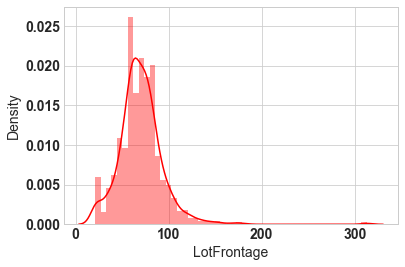

In [385]:
sns.distplot(data['LotFrontage'],color='r')

In [386]:
data['LotFrontage'].mean()

70.04995836802665

In [387]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())

In [388]:
data['LotFrontage'].isna().any()

False

#### Filling Values of MasVnrArea

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

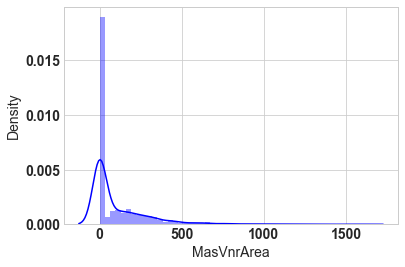

In [389]:
sns.distplot(data['MasVnrArea'],color='b')

In [390]:
data['MasVnrArea'].median()

0.0

In [391]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())

In [392]:
data['MasVnrArea'].isna().any()

False

#### Filling the values of GarageYrBlt

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

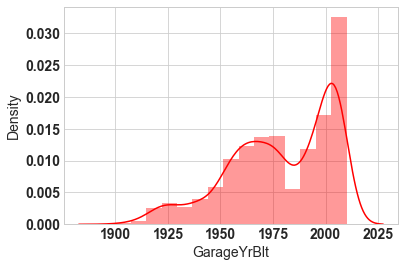

In [393]:
sns.distplot(data['GarageYrBlt'],color='r')

In [394]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

In [395]:
data['GarageYrBlt'].isna().any()

False

##### Filling Categorical Values

In [396]:
data['BsmtQual'].fillna('NA',inplace=True)
data['BsmtCond'].fillna('NA',inplace=True)
data['BsmtExposure'].fillna('NA',inplace=True)
data['BsmtFinType1'].fillna('NA',inplace=True)
data['BsmtFinType2'].fillna('NA',inplace=True)

<AxesSubplot:>

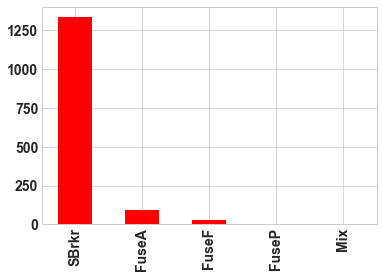

In [397]:
data['Electrical'].value_counts().plot(kind='bar',color='r')

In [398]:
data['Electrical'].fillna(data['Electrical'].value_counts().index[0],inplace=True)

In [399]:
data['Electrical'].isna().any()

False

##### Filling Garage Type

In [400]:
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [401]:
data['GarageType'].fillna(data['GarageType'].value_counts().index[0],inplace=True)
data['GarageFinish'].fillna(data['GarageFinish'].value_counts().index[0],inplace=True)
data['GarageQual'].fillna(data['GarageQual'].value_counts().index[0],inplace=True)
data['GarageCond'].fillna(data['GarageCond'].value_counts().index[0],inplace=True)

In [402]:
mis_col

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC'],
      dtype='object')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


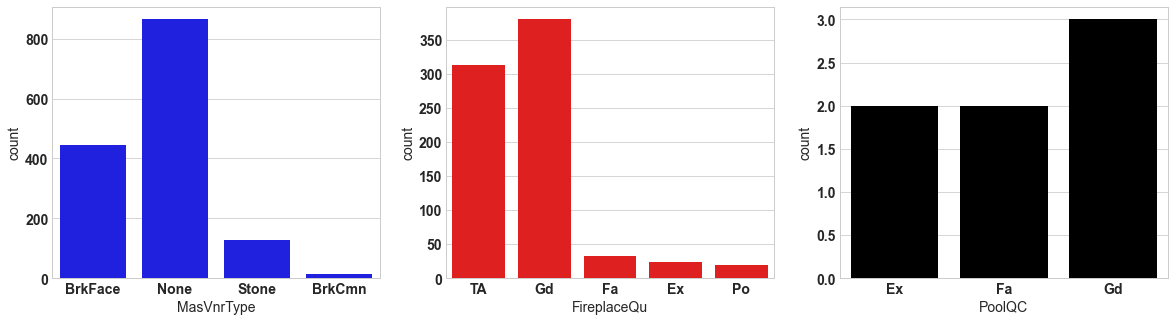

In [403]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
sns.countplot(data['MasVnrType'],color='b',ax=ax1);
sns.countplot(data['FireplaceQu'],color='r',ax=ax2);
sns.countplot(data['PoolQC'],color='black',ax=ax3);

In [404]:
data['MasVnrType'].fillna(data['MasVnrType'].value_counts().index[0],inplace=True)
data['FireplaceQu'].fillna(data['FireplaceQu'].value_counts().index[0],inplace=True)
data['PoolQC'].fillna(data['PoolQC'].value_counts().index[0],inplace=True)

In [405]:
data.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 77, dtype: bool

# Feature Alteration

#### Matematical description

In [406]:
data.describe().style.background_gradient(cmap='coolwarm')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000,12.000000,2010.000000,755000.000000


In [407]:
data.describe(include='object').style.background_gradient(cmap='hot')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,5,5,5,7,7,6,5,2,5,4,7,5,6,3,5,5,3,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,872,906,1282,647,649,1311,953,430,1256,1428,741,1365,1335,735,1360,1070,951,686,1392,1407,1340,1456,1267,1198


# Exploratory Data Analysis

#### Features spliting

In [408]:
categorical_features = list(data.select_dtypes(include='object').columns)
numerical_features = list(data.select_dtypes(exclude='object').columns)

In [409]:
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'SaleType',
 'SaleCondition']

In [410]:
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

# Co-Relation analysis

<AxesSubplot:>

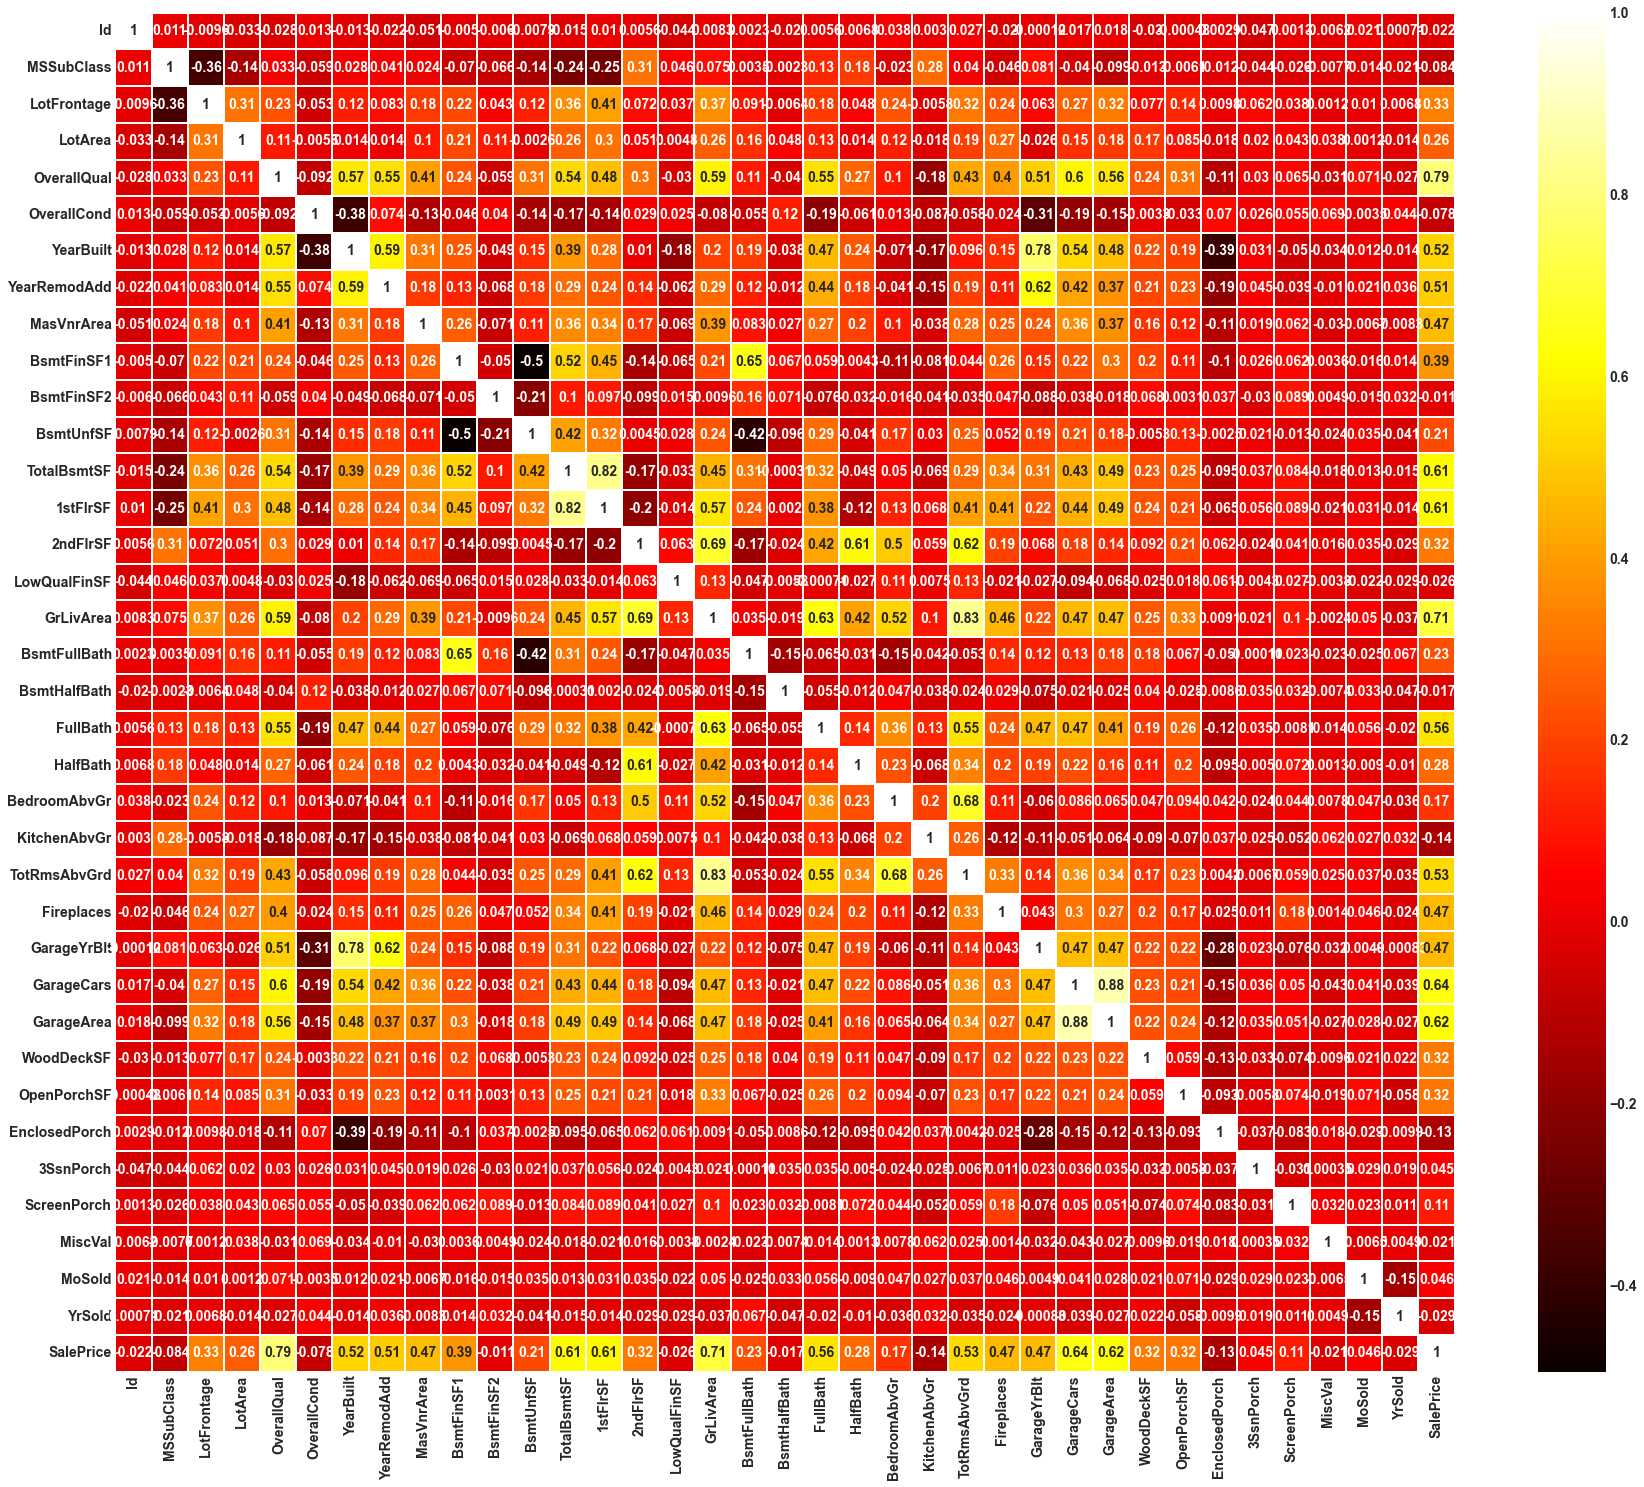

In [411]:
plt.figure(figsize=(30,25))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,cmap='hot')

In [412]:
target_corr = data.corr()['SalePrice'].sort_values(ascending=False)[1:]
target_corr

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

#### The overall quality of the house and Ground living Area has 0.79 and 0.74 correlation with the SalePrice of the house, followed by Garagecars with 0.64 correlation.

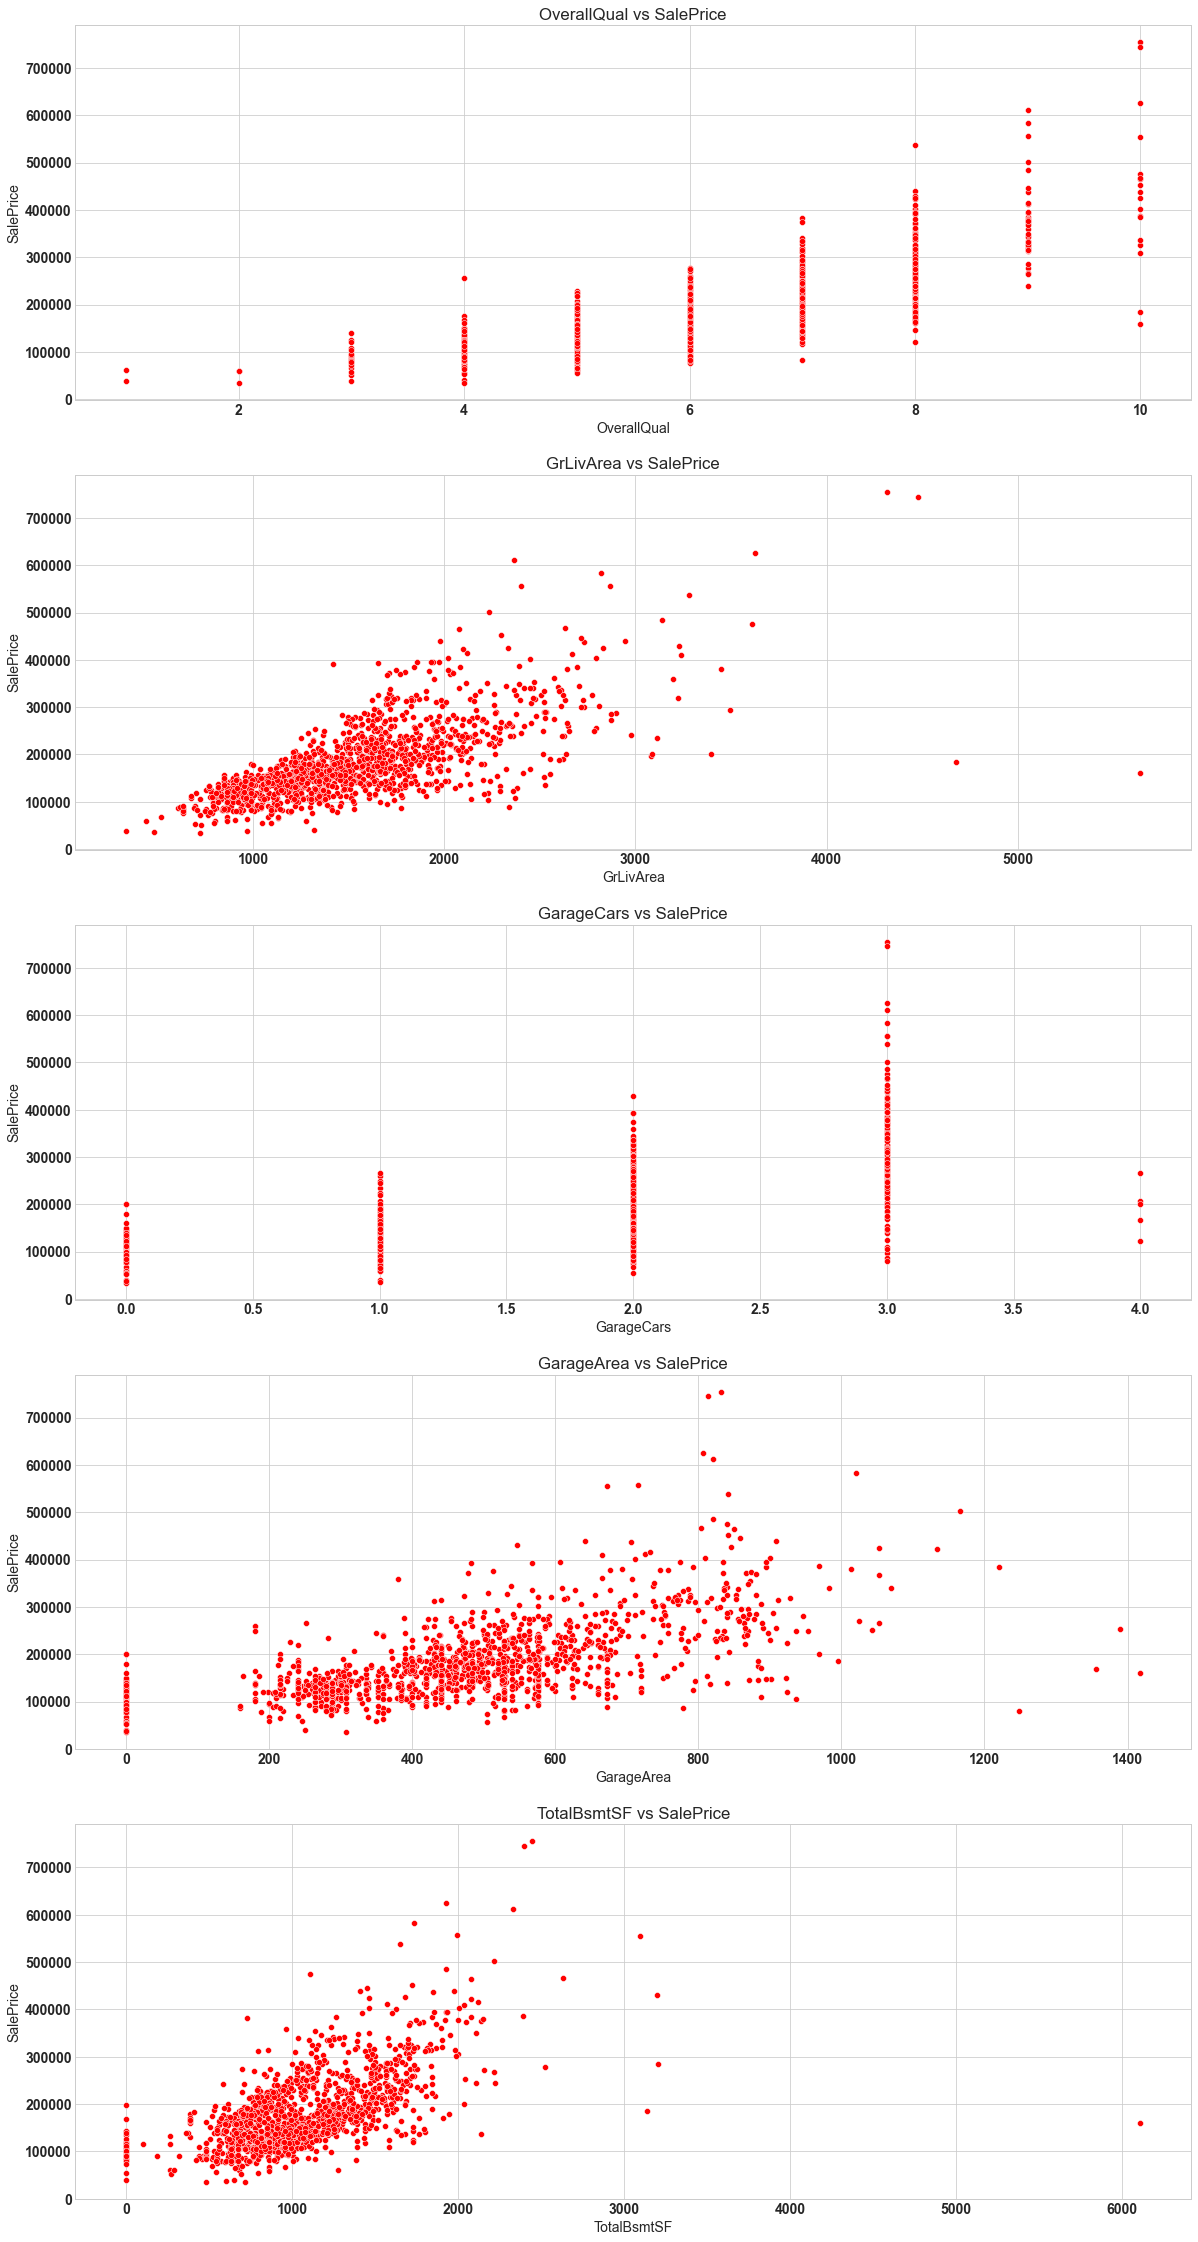

In [413]:
target_corr = target_corr[:5]
fig,ax = plt.subplots(nrows = len(target_corr),ncols = 1, figsize = (20,40))
for i,col in enumerate(target_corr.index):    
    sns.scatterplot(x = col, y = "SalePrice", data = data, ax = ax[i], color = 'r')
    ax[i].set_title(f'{col} vs SalePrice')

#### These above features shows positive corelation towards buying Houses

In [414]:
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

### Getting Continuos Variable

In [415]:
box=data[['LotArea','YearBuilt','BsmtFinSF1','1stFlrSF','2ndFlrSF','LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\si

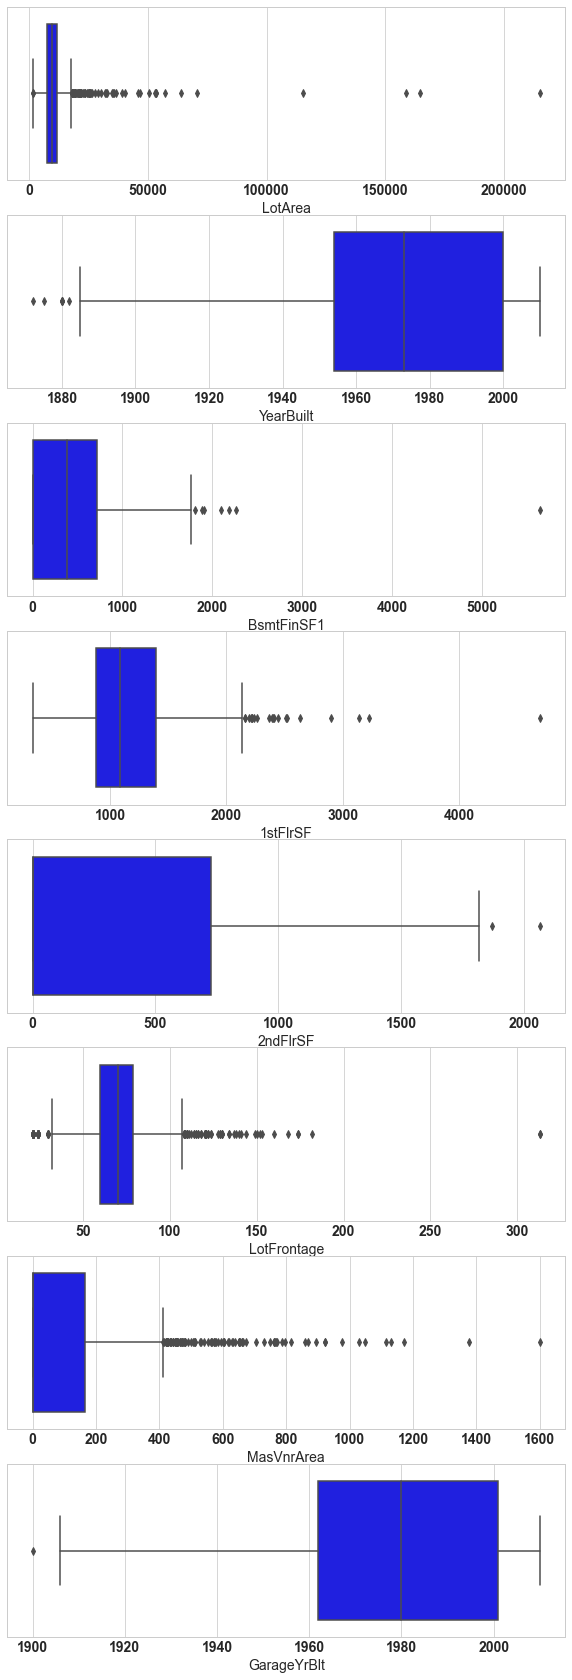

In [416]:
plt.figure(figsize=(10,30))
p_number=1
for c in box:
    ax=plt.subplot(8,1,p_number)
    sns.boxplot(data[c],color='blue')
    p_number=p_number + 1 
plt.show()

In [417]:
def IQR(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    return iqr,q1,q3

In [418]:
col = box.columns
for i in col:
    iqr, q1, q3 = IQR(data,i)
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    data = data[(data[i] > lower) & (data[i] < upper)]

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\si

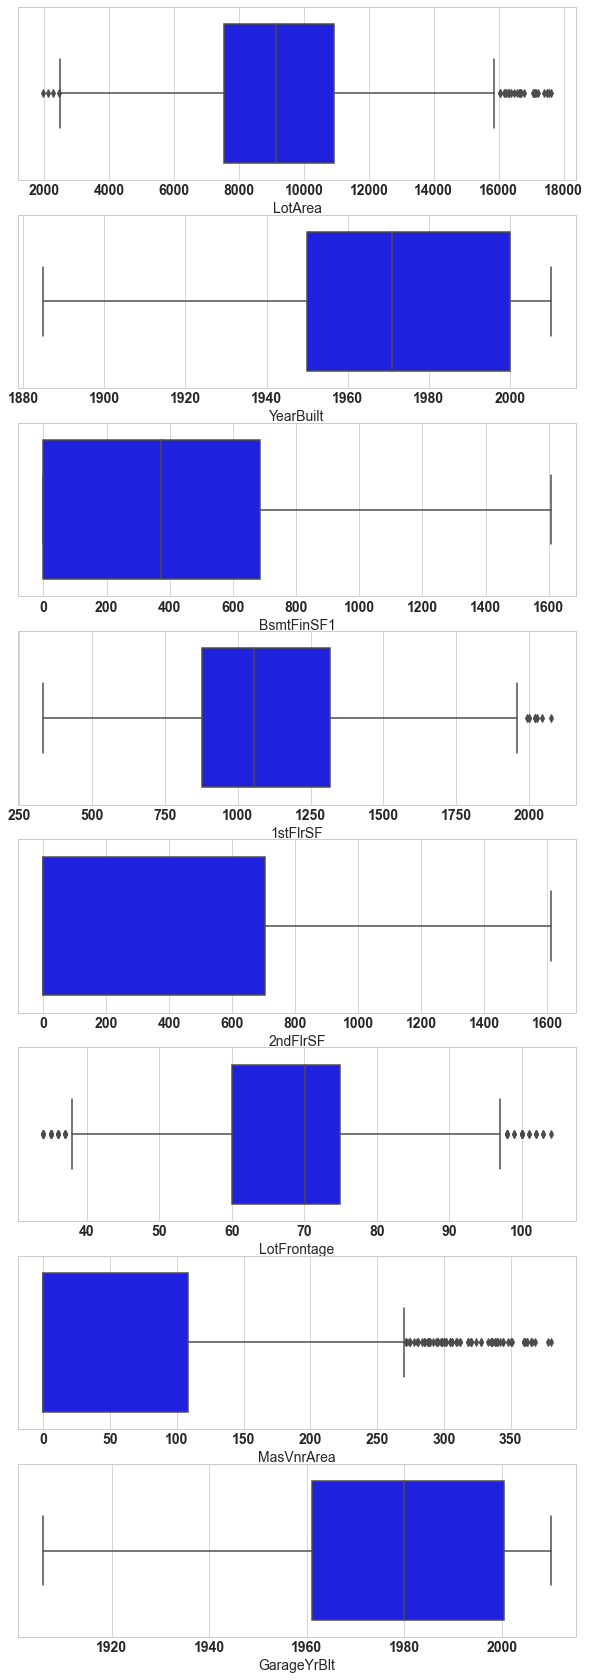

In [419]:
plt.figure(figsize=(10,30))
p_number=1
for c in box:
    ax=plt.subplot(8,1,p_number)
    sns.boxplot(data[c],color='blue')
    p_number=p_number + 1 
plt.show()

# Skew Analysis

In [420]:
skew_fea = pd.DataFrame({'Skew':data[numerical_features].apply(lambda x: skew(x)).sort_values(ascending=False)})
skew_fea.style.background_gradient(cmap='coolwarm')

,Skew
MiscVal,27.060502
3SsnPorch,11.118294
LowQualFinSF,9.349328
BsmtFinSF2,4.491518
ScreenPorch,4.417426
KitchenAbvGr,4.177977
BsmtHalfBath,4.055208
EnclosedPorch,2.665979
OpenPorchSF,2.564222
MSSubClass,1.498936


In [421]:
skew_fea = skew_fea[abs(skew_fea > 0.8)]

# printing how many features are to be box-cox transformed
print("There are {} skewed numerical features to box cox transform".format(skew_fea.shape[0]))
# defining skewed features
skewed_features = skew_fea.index

lamda = 0.15
for features in skewed_features:
    data[features] += 1
    data[features] = boxcox1p(data[features], lamda)
data[skewed_features] = np.log1p(data[skewed_features])
print('Skewness has been Handled using Box Cox Transformation')

There are 37 skewed numerical features to box cox transform
Skewness has been Handled using Box Cox Transformation


In [422]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [423]:
df = data.copy()

In [424]:
df2 = data[df.corr().loc["SalePrice"][abs(df.corr().loc["SalePrice"])>0.25].index]

In [425]:
df2.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [426]:
test_data.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

In [427]:
df2['SalePrice']

0       3.588811
1       3.564712
2       3.600854
3       3.519381
4       3.620236
          ...   
1455    3.558362
1456    3.590055
1457    3.631270
1458    3.522019
1459    3.528517
Name: SalePrice, Length: 1187, dtype: float64

# Lable Encoding

In [428]:
Label_Encoder = LabelEncoder()
for i in df2.select_dtypes(include='object').columns:
    df2[i] = Label_Encoder.fit_transform(df2[i].astype(str))

In [429]:
df2.dtypes

LotFrontage     float64
LotArea         float64
OverallQual     float64
YearBuilt       float64
YearRemodAdd    float64
MasVnrArea      float64
TotalBsmtSF     float64
1stFlrSF        float64
GrLivArea       float64
FullBath        float64
HalfBath        float64
TotRmsAbvGrd    float64
Fireplaces      float64
GarageYrBlt     float64
GarageCars      float64
GarageArea      float64
WoodDeckSF      float64
OpenPorchSF     float64
SalePrice       float64
dtype: object

# Feature Scalling

In [430]:
df2.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [431]:
df2['SalePrice'] = data_1['SalePrice']

C:\Users\admin\AppData\Local\Temp\ipykernel_16232\1189026228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SalePrice'] = data_1['SalePrice']


In [432]:
x = df2.drop(['SalePrice'],axis=1).values
y = df2['SalePrice'].values

In [433]:
#using minmax scaler to scale all the datas
mc=MinMaxScaler()
scaled_x=mc.fit_transform(x)

# Model Building

##### Spliting into training and testing set

In [434]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=112)

In [435]:
print(f"Shape of Training Set : {x_train.shape}")
print(f"Shape of Testing Set : {x_test.shape}")

Shape of Training Set : (949, 18)
Shape of Testing Set : (238, 18)


##### Multiple Linear Regression

In [436]:
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

# Model Metrics

##### Score on Model

In [437]:
LR.score(x_test,y_test)

0.8066116522829414

In [438]:
y_pred

array([183313.12301627, 242069.46376534, 135712.95987435, 177961.04558746,
       197369.15872647, 130205.93431487, 123121.82780571, 194435.3757109 ,
       220112.83237408, 278120.30763292, 145158.61817098, 182128.91714118,
       202300.82973265, 219932.51356786, 187421.35734125, 231369.96936584,
       142604.3264016 , 238415.27070098, 148814.03530122, 172181.60403046,
       141456.58238325, 171466.73097229, 209558.37419656, 110362.89275167,
       129925.38205222, 284783.92809257, 188890.51591902, 164688.90715814,
        91142.80074626,  77983.12929332, 132392.7926965 ,  93130.1445062 ,
       128410.61491502, 153285.1956385 , 121049.51585437,  93012.29873724,
       171042.91358035, 101022.24717715, 192397.98944767, 264574.14958512,
        72752.98730513, 249244.48490876, 232294.05093705, 229958.46309522,
        22230.1982427 , 186491.66030958, 171897.90532552, 170055.71303837,
       247201.83393545, 220600.04474742, 224188.21827157, 136858.83885637,
       104294.49291425, 2

### R2 Score

In [439]:
test_sc=r2_score(y_test,y_pred)
print('Linear Regression r2_score for testing is',test_sc)

Linear Regression r2_score for testing is 0.8066116522829414


### Mean Absolute Percentage Error

In [440]:
mean_absolute_percentage_error(y_test,y_pred)*100

13.131297254190285

### Mean Absolute Error

In [441]:
mean_absolute_error(y_test,y_pred)

20286.54102784669

### Cross Value Score

In [442]:
from sklearn.model_selection import cross_val_score,KFold

kf = KFold(n_splits=10)

cross_val_score(LR,x,y,cv=kf).mean()

0.780454499904747

# GBR

In [443]:
from sklearn.ensemble import GradientBoostingRegressor

model2 = GradientBoostingRegressor()

model2.fit(x_train,y_train)

y_pred2 = model2.predict(x_test)

mean_absolute_error(y_test,y_pred2),r2_score(y_test,y_pred2)

(15280.184635825673, 0.8594110762918652)

In [444]:
cross_val_score(model2,x,y,cv=kf).mean()

0.8652287031389576

# Test Data

In [445]:
test_data = pd.read_csv("DataSet/test (1).csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1205,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal
1,1206,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2,1207,20,RH,NaN,8900,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,11,2006,WD,Normal
3,1208,20,RL,70.0,9135,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
4,1209,20,RL,70.0,7763,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal


In [446]:
train_col = list(df2.columns)
train_col.remove('SalePrice')
train_col

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [447]:
test_data = test_data[train_col]
test_data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,78.0,10140,5,1975,1975,0.0,1056,1074,1074,1,1,6,0,1975.0,2,495,0,88
1,90.0,14684,7,1990,1991,234.0,2158,2196,2196,2,0,7,1,1990.0,3,701,84,70
2,NaN,8900,4,1966,1966,0.0,1056,1056,1056,1,0,5,0,1966.0,1,384,0,42
3,70.0,9135,6,2003,2003,120.0,1682,1700,1700,2,0,7,0,2003.0,2,544,192,23
4,70.0,7763,5,1962,1980,0.0,931,1283,1283,1,0,6,0,1980.0,2,506,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,62.0,7917,6,1999,2000,0.0,953,953,1647,2,1,7,1,1999.0,2,460,0,40
252,85.0,13175,6,1978,1988,119.0,1542,2073,2073,2,0,7,2,1978.0,2,500,349,0
253,66.0,9042,7,1941,2006,0.0,1152,1188,2340,2,0,9,2,1941.0,1,252,0,60
254,68.0,9717,5,1950,1996,0.0,1078,1078,1078,1,0,5,0,1950.0,1,240,366,0


In [448]:
test_data.isna().any()

LotFrontage      True
LotArea         False
OverallQual     False
YearBuilt       False
YearRemodAdd    False
MasVnrArea       True
TotalBsmtSF     False
1stFlrSF        False
GrLivArea       False
FullBath        False
HalfBath        False
TotRmsAbvGrd    False
Fireplaces      False
GarageYrBlt      True
GarageCars      False
GarageArea      False
WoodDeckSF      False
OpenPorchSF     False
dtype: bool

In [449]:
df2.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [450]:
test_data['LotFrontage'].fillna(test_data.LotFrontage.median(),inplace=True)
test_data['MasVnrArea'].fillna(test_data.MasVnrArea.median(),inplace=True)
test_data['GarageYrBlt'].fillna(test_data.GarageYrBlt.median(),inplace=True)

In [451]:
col_test_data = test_data.select_dtypes(exclude='object').columns

In [468]:
tX = test_data.iloc[:,:].values
scaler = MinMaxScaler()
tX = scaler.fit_transform(tX)

out = pd.DataFrame(model2.predict(tX))

out.index = np.arange(1205,1461)
out.columns = ['SalePrice']

In [469]:
out

,SalePrice
1205,39179.043004
1206,39179.043004
1207,39179.043004
1208,39179.043004
1209,39179.043004
...,...
1456,39179.043004
1457,39179.043004
1458,39179.043004
1459,39179.043004


In [475]:
out.to_csv('Output.csv')